In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor


C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [4]:
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
gender                         700 non-null object
ethnicity                      700 non-null object
parental level of education    700 non-null object
lunch                          700 non-null object
test preparation course        700 non-null object
reading score                  700 non-null int64
writing score                  700 non-null int64
math score                     700 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.8+ KB


In [6]:
train_df.shape

(700, 8)

In [7]:
train_df.describe()

,reading score,writing score,math score
count,700.000000,700.000000,700.000000
mean,69.751429,68.497143,66.442857
std,14.600877,15.224265,15.249227
min,23.000000,15.000000,8.000000
25%,60.000000,58.000000,57.000000
50%,70.000000,70.000000,66.500000
75%,80.000000,79.000000,77.000000
max,100.000000,100.000000,100.000000


In [8]:
print('gender:', train_df.gender.unique(), train_df.gender.nunique())
print('ethnicity:', train_df.ethnicity.unique(), train_df.ethnicity.nunique())
print('parental edu:', train_df['parental level of education'].unique(), train_df['parental level of education'].nunique())
print('lunch:', train_df.lunch.unique(), train_df.lunch.nunique())
print('test course:', train_df['test preparation course'].unique(), train_df['test preparation course'].nunique())

gender: ['male' 'female'] 2
ethnicity: ['group C' 'group A' 'group E' 'group B' 'group D'] 5
parental edu: ['some college' "associate's degree" 'some high school' 'high school'
 "master's degree" "bachelor's degree"] 6
lunch: ['standard' 'free/reduced'] 2
test course: ['none' 'completed'] 2


In [9]:
train_df.isna().sum()

gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
reading score                  0
writing score                  0
math score                     0
dtype: int64

In [10]:
train_df = pd.get_dummies(train_df, columns=['gender','ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

In [11]:
train_df.columns

Index(['reading score', 'writing score', 'math score', 'gender_male',
       'ethnicity_group B', 'ethnicity_group C', 'ethnicity_group D',
       'ethnicity_group E', 'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')

In [12]:
sc = StandardScaler()

cols_to_scale = ['reading score', 'writing score', 'math score']
train_df[cols_to_scale] = sc.fit_transform(train_df[cols_to_scale])

<function matplotlib.pyplot.show(*args, **kw)>

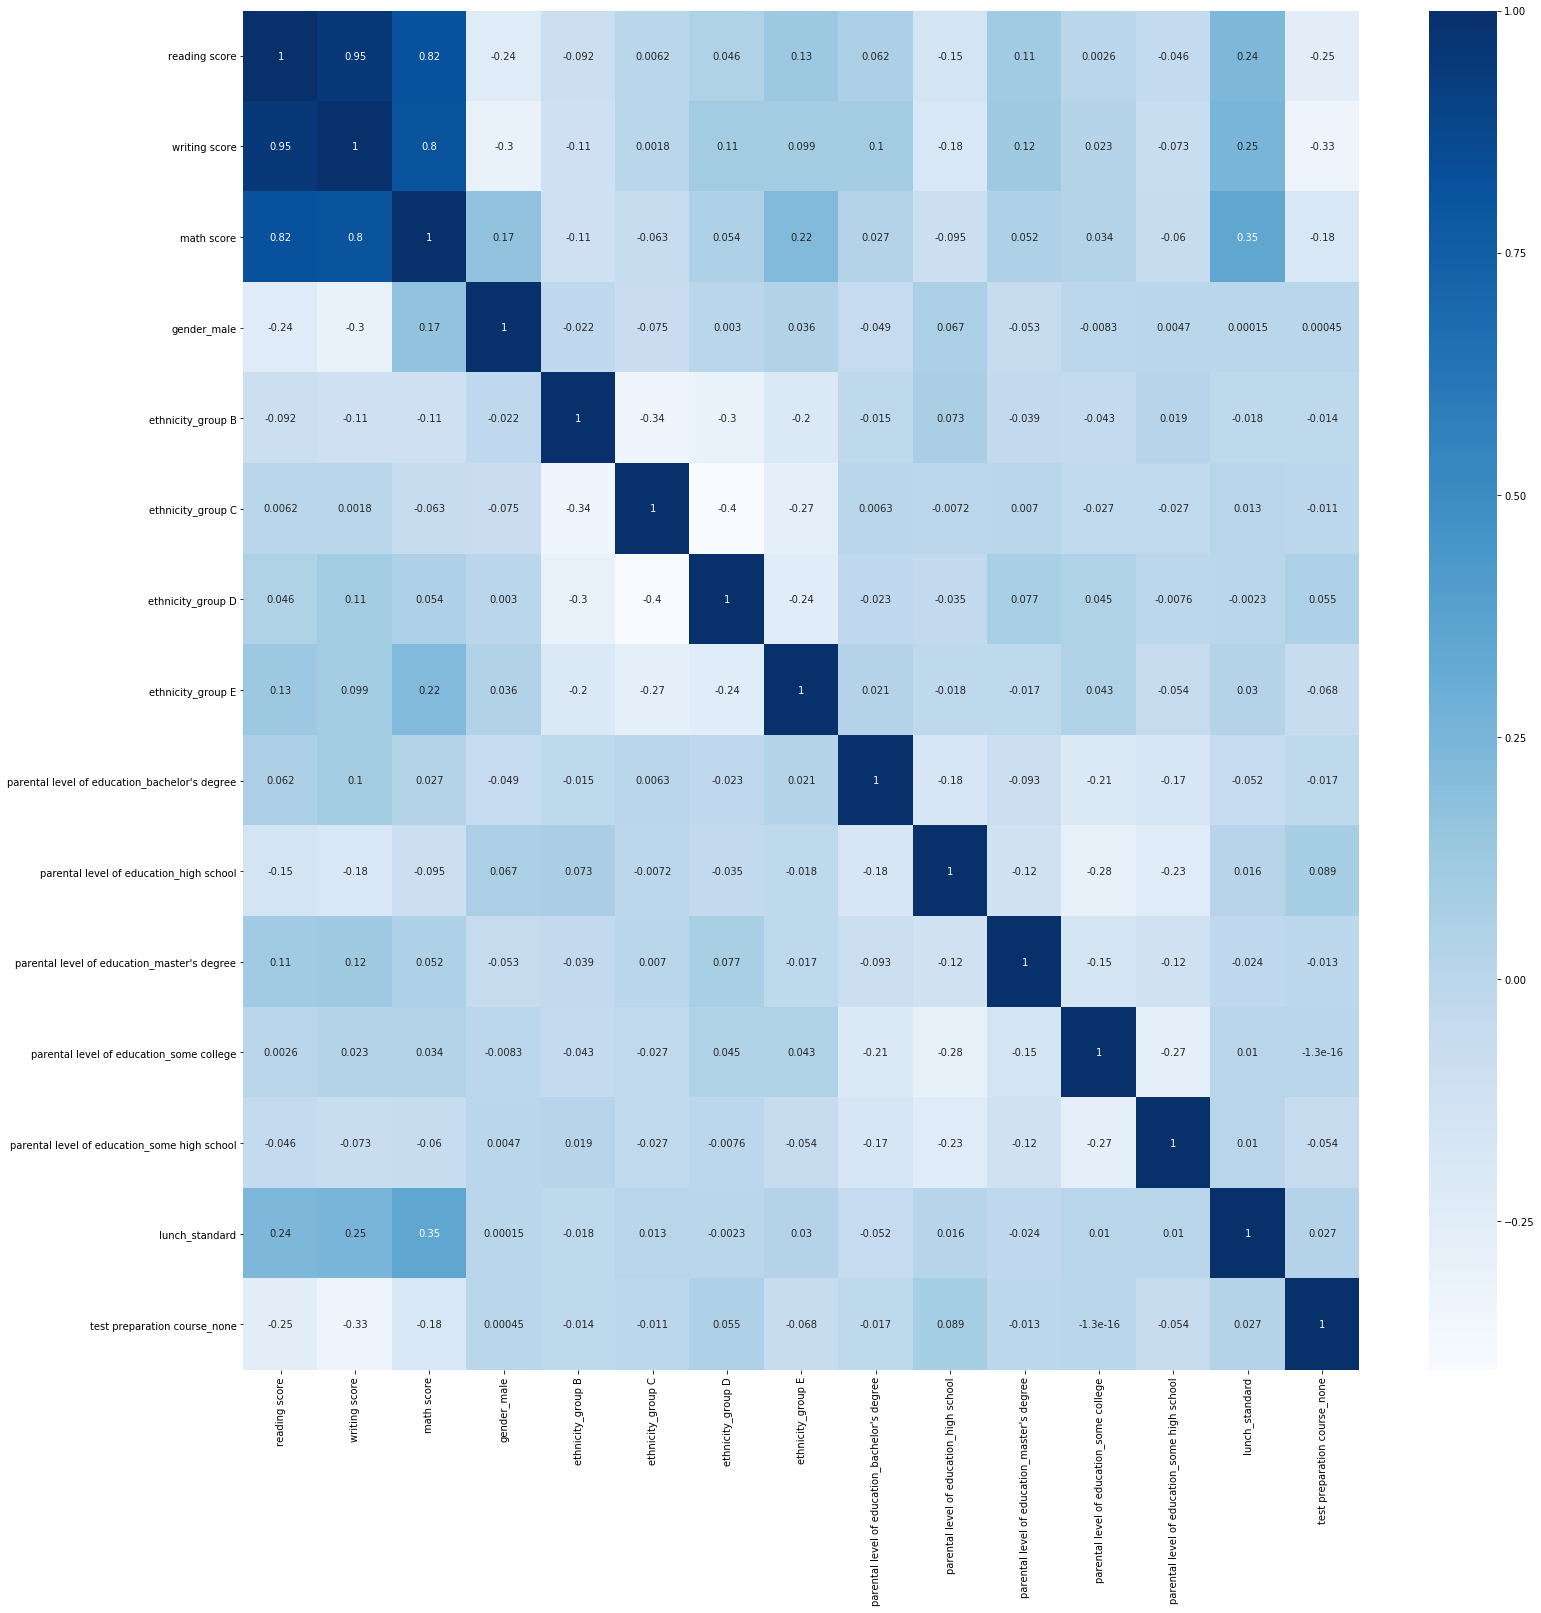

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 25))
sns.heatmap(train_df.corr(), annot=True, cmap='Blues')

In [14]:
X = train_df.drop(['math score'], axis=1)        # Independant Variable / Features
y = train_df['math score']                       # Dependant Variable / Target

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [16]:
model.feature_importances_

array([0.33814447, 0.40796209, 0.131219  , 0.00853508, 0.00882485,
       0.00884746, 0.01342726, 0.00784665, 0.0091056 , 0.003621  ,
       0.01022905, 0.00774042, 0.02766213, 0.01683496])

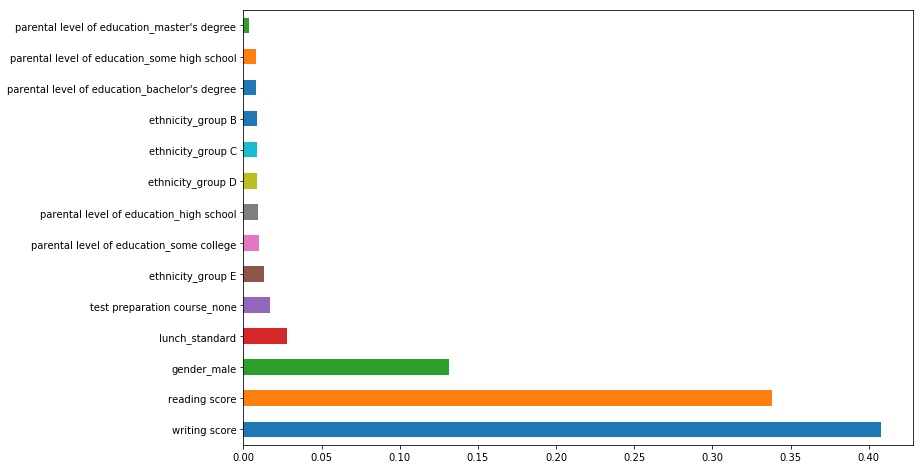

In [17]:
plt.figure(figsize=(12,8))
impft = pd.Series(model.feature_importances_, index=X.columns)
impft.nlargest(20).plot(kind='barh')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.010, random_state = 42)      # 80% train data, 20% test data

In [22]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt as r

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

mod_lin = LinearRegression()
mod_lin.fit(X_train, y_train)

ypred_lin = mod_lin.predict(X_test)

In [42]:
# Metrics for Linear Regression

rmse_lin = r(mse(y_test, ypred_lin))
print('RMSE Lin:', rmse_lin)

RMSE Lin: 0.38755742595958875


# Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

mod_rid = Ridge(alpha=1.0, random_state=42)
mod_rid.fit(X_train, y_train)
ypred_rid = mod_rid.predict(X_test)

In [47]:
rmse_rid = r(mse(y_test, ypred_rid))
print('RMSE Rid:', rmse_rid)

RMSE Rid: 0.38225301115692506


#  BAYESIAN-ARD REGRESSION

In [48]:
from sklearn.linear_model import ARDRegression

mod_bard = ARDRegression()
mod_bard.fit(X_train, y_train)
ypred_bard = mod_bard.predict(X_test)

In [49]:
rmse_bard = r(mse(y_test, ypred_bard))
print('RMSE Bayesian ARD:', rmse_bard)

RMSE Bayesian ARD: 0.3791520480014709


#  BAYESIAN RIDGE REGRESSION

In [51]:
from sklearn.linear_model import BayesianRidge

mod_brid = BayesianRidge()
mod_brid.fit(X_train, y_train)
ypred_brid = mod_brid.predict(X_test)

In [52]:
rmse_brid = r(mse(y_test, ypred_brid))
print('RMSE Bayesian Ridge:', rmse_brid)

RMSE Bayesian Ridge: 0.38232664155814583


In [53]:
import pickle

lin_model = 'lin_model.sav'
pickle.dump(mod_lin, open(lin_model, 'wb'))

In [58]:
rr_model = 'rr_model.sav'
pickle.dump(mod_rid, open(rr_model, 'wb'))

# Test Data

In [43]:
test_df = pd.read_csv('test.csv')

In [44]:
test_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [45]:
test_df = pd.get_dummies(test_df, columns=['gender','ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

In [54]:
lin_model_loaded = pickle.load(open(lin_model, 'rb'))
test_lin_model_loaded = lin_model_loaded.fit(X_train, y_train)
test_ypred = test_lin_model_loaded.predict(test_df)

In [55]:
test_df['math score'] = test_ypred.astype(int)

In [56]:
# Setting the index name
test_df.index.name = 'idx'

In [57]:
test_df = test_df['math score'].to_csv('output.csv',  index=True, header=True)

In [60]:
test_df1 = pd.read_csv('test.csv')
test_df1.drop(['Unnamed: 0'], axis=1, inplace=True)
test_df1 = pd.get_dummies(test_df1, columns=['gender','ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)


In [61]:
rr_model_loaded = pickle.load(open(rr_model, 'rb'))
test_rr_model_loaded = rr_model_loaded.fit(X_train, y_train)
test_ypred1 = test_rr_model_loaded.predict(test_df1)

In [62]:
test_df1['math score'] = test_ypred.astype(int)
test_df1.index.name = 'idx'
test_df1 = test_df1['math score'].to_csv('output1.csv',  index=True, header=True)